In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C, Datasets as D, Parsers as P, Utilities as U
from mppi.Calculators import Tools
from mppi.Datasets import PostProcessing as PP
from mppi.Utilities import Constants as Const
from mppi.Utilities import LatticeUtils as LL
import matplotlib.pyplot as plt
import numpy as np
import os, yaml

# Report

This notebook collects the relevant results achieved for the systems. In this way we aim to plot and analyze the relevant data
without the whole procedure needed to compute them. This procedure is also needed to identify the results the have to be saved 
in order to be able to export and use the (relevant) data only.

## DFT Analysis

### KS evals and k-point sampling

In [33]:
data = P.PwParser('DFT_analysis/kpoints_72-nbnds_600.xml')
data.get_gap()

Parse file : DFT_analysis/kpoints_72-nbnds_600.xml
Direct gap system
Gap : 0.024297119130852418 eV


{'gap': 0.024297119130852418,
 'direct_gap': 0.024297119130852418,
 'position_cbm': 468,
 'position_vbm': 468,
 'position_direct_gap': 468}

number of kpoints = 469


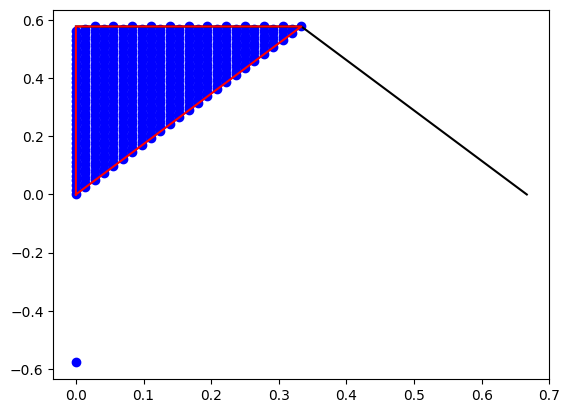

In [34]:
kp = data.kpoints # cartesian coordinates in units of 2\pi/alat

Gamma = np.array([0.,0.])
K = np.array([2./3.,0])
M = np.array([1./2.,1./(2*np.sqrt(3))])
Kp = np.array([1./3.,1./np.sqrt(3)])
Mp = np.array([0.,1./np.sqrt(3)])

BZ = [K, Kp, Mp]
print('number of kpoints = %s'%len(kp))
plt.plot(*np.column_stack(BZ),color='black')
IBZ = [Gamma,Kp, Mp,Gamma]
plt.plot(*np.column_stack(IBZ),color='red')
plt.scatter(kp[:,0],kp[:,1],c='blue')

### Band structure

In [35]:
bands_data = 'DFT_analysis/bands.save/data-file-schema.xml'

In [36]:
# we write the coordinates of the high symmetry points (using the tpiba_b type of pw) and we make usage of the function build_kpath
G = [0.,0.,0.]
Kp = [1./3.,1./np.sqrt(3),0.]
Mp = [0.,1./np.sqrt(3),0.]
high_sym = {'G':G,'K':Kp,'M':Mp} # useful to label the high-sym point on the path

bands = U.BandStructure.from_Pw(bands_data,high_sym_points=high_sym)

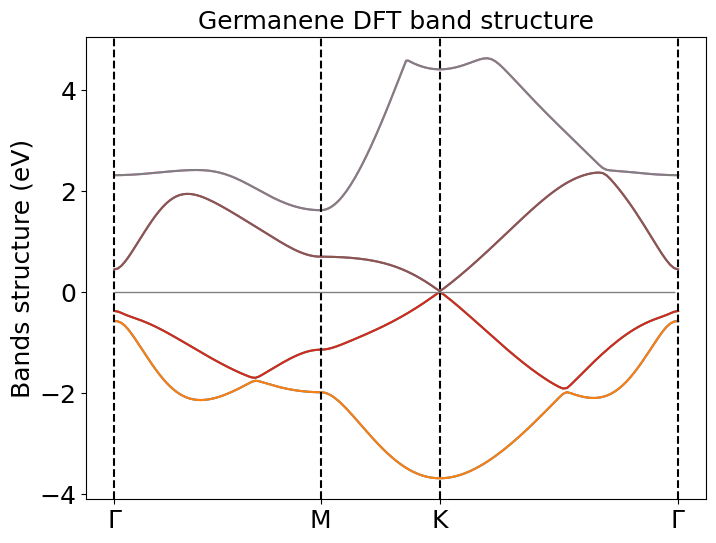

In [41]:
label_size = 18

fig, ax = plt.subplots(figsize=(8, 6))
#ax.set_ylim(-5,7)
bands.plot(plt,selection=[i for i in range(24,32)])
ax.hlines(0.,0.,1.57,linestyles='-',color='gray',linewidth=1)
ax.set_ylabel('Bands structure (eV)',size=label_size)
ax.set_title('Germanene DFT band structure',size=label_size)
ax.tick_params(axis='both', which='major', labelsize=label_size)

#plt.savefig(fname='Plot/band_structure.eps',format='eps',bbox_inches = "tight")

## GW Analysis

### Convergence Analysis

In [ ]:
..............

### Band Structure

In [42]:
Gamma = np.array([0.,0.,0.])
Kp = np.array([1./3.,1./np.sqrt(3),0.])
#Mp = np.array([0.,1./np.sqrt(3),0.])
Mp = np.array([0.,0.5613128,0.]) # use this approximated value beacuse computation at M is lacking for symmetry reasons

high_sym = {'G':Gamma,'K':Kp,'M':Mp} # in cartesian coordinates
high_sym

{'G': array([0., 0., 0.]),
 'K': array([0.33333333, 0.57735027, 0.        ]),
 'M': array([0.       , 0.5613128, 0.       ])}

In [43]:
from mppi.Utilities.Utils import file_parser

In [54]:
kpoints_sampled = file_parser('MB_analysis/kpoints_72-nbnds_600/kpoints_sampled.log').T
data_dft = file_parser('MB_analysis/kpoints_72-nbnds_600/data_dft.log')
data_gw = file_parser('MB_analysis/kpoints_72-nbnds_600/data_gw.log')

In [55]:
kpoints_sampled.shape,data_dft.shape,data_gw.shape

((72, 3), (8, 72), (8, 72))

In [57]:
bands_dft = U.BandStructure(kpoints_sampled,data_dft,high_sym_points=high_sym) 
bands_gw = U.BandStructure(kpoints_sampled,data_gw-max(data_gw[3]),high_sym_points=high_sym)

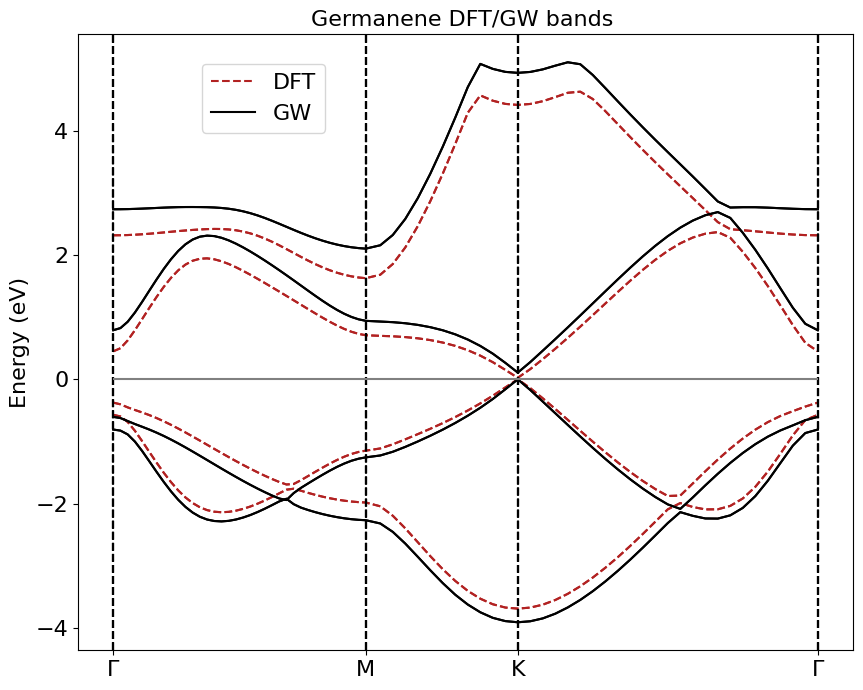

In [58]:
fig, ax1 = plt.subplots(figsize=(10,8))
bands_dft.plot(plt,axes=ax1,selection=[0],linestyle='--',label='DFT',c='firebrick')
bands_dft.plot(plt,axes=ax1,selection=[1,2,3,4,5,6,7],linestyle='--',c='firebrick')
bands_gw.plot(plt,axes=ax1,selection=[0],linestyle='-',label='GW',c='black')
bands_gw.plot(plt,axes=ax1,selection=[1,2,3,4,5,6,7],linestyle='-',c='black')
ax1.hlines(0.,0.,max(bands_dft.kpath),linestyles='-',color='gray')
#ax1.set_ylim(-0.5,0.5)
ax1.set_ylabel('Energy (eV)',size=16)
ax1.set_title('Germanene DFT/GW bands ',size=16)
ax1.legend(loc=(0.16,0.84),fontsize=16,frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=16)

0.108232


/scratch_local/ipykernel_3749582/3786321106.py:20: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.065,0.7,0.3,0.28])


(-0.4, 0.6)

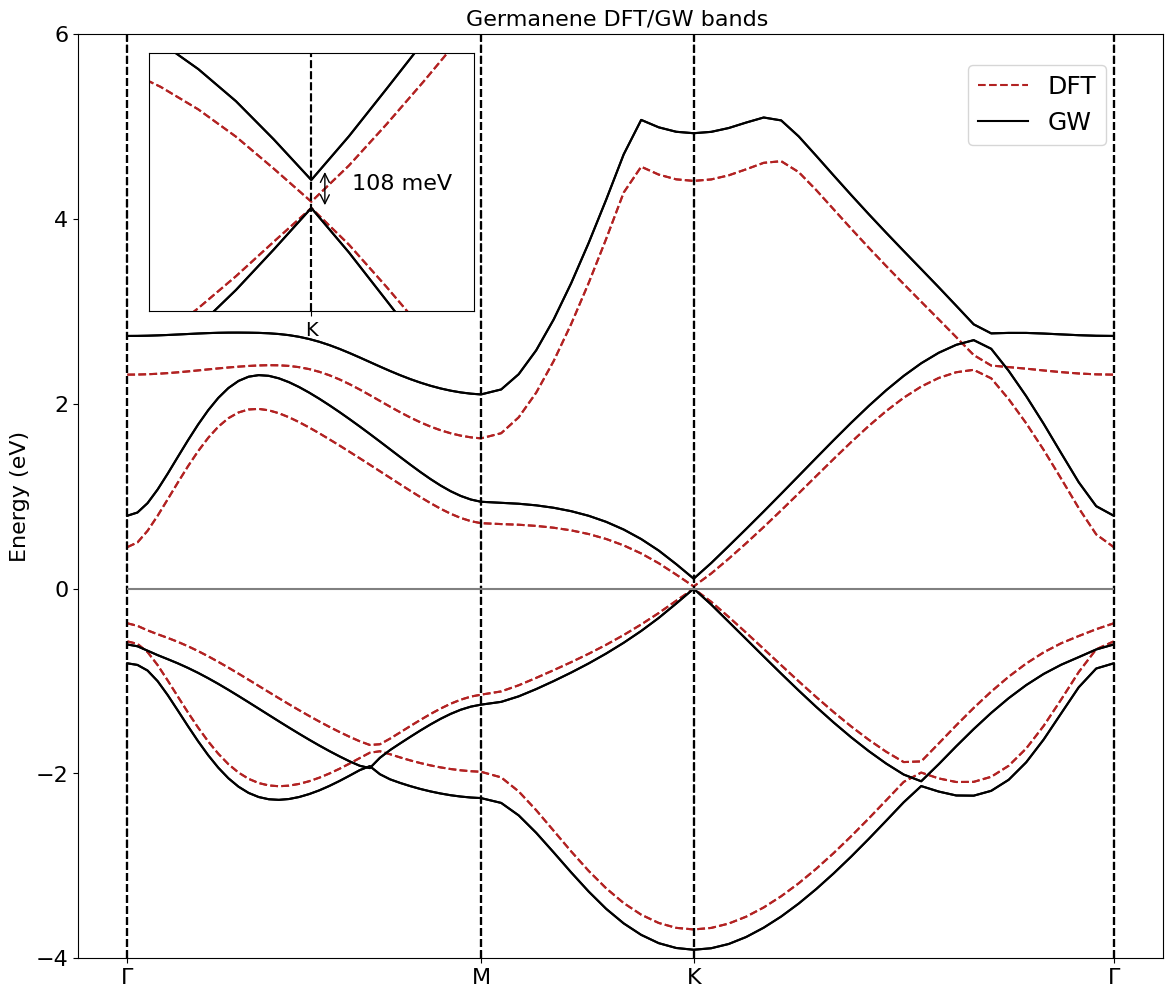

In [59]:
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition,inset_axes
K_position = bands_dft.get_high_sym_positions()[1][2]
shift = 0.12
gap = min(bands_gw.bands[4])-max(bands_gw.bands[3])
print(gap)

fig, ax1 = plt.subplots(figsize=(14,12))
bands_dft.plot(plt,axes=ax1,selection=[0],linestyle='--',label='DFT',c='firebrick')
bands_dft.plot(plt,axes=ax1,selection=[1,2,3,4,5,6,7],linestyle='--',c='firebrick')
bands_gw.plot(plt,axes=ax1,selection=[0],linestyle='-',label='GW',c='black')
bands_gw.plot(plt,axes=ax1,selection=[1,2,3,4,5,6,7],linestyle='-',c='black')
ax1.hlines(0.,0.,max(bands_dft.kpath),linestyles='-',color='gray')
ax1.set_ylim(-4.0,6)
ax1.set_ylabel('Energy (eV)',size=16)
ax1.set_title('Germanene DFT/GW bands ',size=16)
ax1.legend(loc=(0.82,0.88),fontsize=18,frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=16)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.065,0.7,0.3,0.28])
ax2.set_axes_locator(ip)
bands_dft.plot(plt,axes=ax2,selection=[2,3,4,5],linestyle='--',c='firebrick')
bands_gw.plot(plt,axes=ax2,selection=[2,3,4,5],linestyle='-',c='black')
ax2.annotate('', xy=(K_position+0.01, 0), xytext=(K_position+0.01, 0.15), arrowprops=dict(arrowstyle='<->'),size=16)
ax2.text(K_position+0.03,0.07,'108 meV',size=16)
ax2.set_yticks([])
ax2.set_xlim(K_position-shift,K_position+shift)
ax2.set_ylim(-0.4,0.6)

#plt.savefig(fname='Plot/Germanene-band_structure-kpoints_%s.eps'%kpoints,format='eps',bbox_inches = "tight")
#plt.savefig(fname='Plot/Germanene-band_structure-kpoints_%s.jpg'%kpoints,format='jpeg',bbox_inches = "tight")

## OPTICS

We save the results of the BSE analysis for the various kpoints sampling considered.

In [68]:
ksamplings = {'18x18x1': {'folder':'kpoints_18-nbnds_800','K_index':37,'G_index':1},
             '60x60x1': {'folder':'kpoints_60-nbnds_600','K_index':331,'G_index':1},
             '72x72x1': {'folder':'kpoints_72-nbnds_600','K_index':469,'G_index':1},
            }

start_band,stop_band = 28,29

for kpoints in ksamplings:
    run_dir=os.path.join('MB_analysis',ksamplings[kpoints]['folder'])
    file = os.path.join(run_dir,'pp-K-kpoints_%s'%kpoints,'o-pp-K-kpoints_%s.qp'%kpoints)
    data = P.YamboOutputParser.from_file(file)
    ksamplings[kpoints]['gw_gap'] = data.get_gap(k_full=ksamplings[kpoints]['K_index'],band_full=start_band,verbose=False)
ksamplings

Parse file MB_analysis/kpoints_18-nbnds_800/pp-K-kpoints_18x18x1/o-pp-K-kpoints_18x18x1.qp
Parse file MB_analysis/kpoints_60-nbnds_600/pp-K-kpoints_60x60x1/o-pp-K-kpoints_60x60x1.qp
Parse file MB_analysis/kpoints_72-nbnds_600/pp-K-kpoints_72x72x1/o-pp-K-kpoints_72x72x1.qp


{'18x18x1': {'folder': 'kpoints_18-nbnds_800',
  'K_index': 37,
  'G_index': 1,
  'gw_gap': 0.401197},
 '60x60x1': {'folder': 'kpoints_60-nbnds_600',
  'K_index': 331,
  'G_index': 1,
  'gw_gap': 0.12700999999999996},
 '72x72x1': {'folder': 'kpoints_72-nbnds_600',
  'K_index': 469,
  'G_index': 1,
  'gw_gap': 0.108232}}

In [71]:
alpha_data = []
exc_data = []
for kpoint in ksamplings:
    alpha_file = os.path.join('MB_analysis',ksamplings[kpoint]['folder'],
                        'abs-bse-bsengblk_3.0-bands_27-30-kpoints_%s'%kpoint,
                        'o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_%s.alpha_q1_slepc_bse'%kpoint)
    exc_file = os.path.join('MB_analysis',ksamplings[kpoint]['folder'],
                        'abs-bse-bsengblk_3.0-bands_27-30-kpoints_%s'%kpoint,
                        'o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_%s.Esort_q1_slepc_bse'%kpoint)
    alpha_data.append(P.YamboOutputParser.from_file(alpha_file))
    exc_data.append(P.YamboOutputParser.from_file(exc_file))

Parse file MB_analysis/kpoints_18-nbnds_800/abs-bse-bsengblk_3.0-bands_27-30-kpoints_18x18x1/o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_18x18x1.alpha_q1_slepc_bse
Parse file MB_analysis/kpoints_18-nbnds_800/abs-bse-bsengblk_3.0-bands_27-30-kpoints_18x18x1/o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_18x18x1.Esort_q1_slepc_bse
Parse file MB_analysis/kpoints_60-nbnds_600/abs-bse-bsengblk_3.0-bands_27-30-kpoints_60x60x1/o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_60x60x1.alpha_q1_slepc_bse
Parse file MB_analysis/kpoints_60-nbnds_600/abs-bse-bsengblk_3.0-bands_27-30-kpoints_60x60x1/o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_60x60x1.Esort_q1_slepc_bse
Parse file MB_analysis/kpoints_72-nbnds_600/abs-bse-bsengblk_3.0-bands_27-30-kpoints_72x72x1/o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_72x72x1.alpha_q1_slepc_bse
Parse file MB_analysis/kpoints_72-nbnds_600/abs-bse-bsengblk_3.0-bands_27-30-kpoints_72x72x1/o-abs-bse-bsengblk_3.0-bands_27-30-kpoints_72x72x1.Esort_q1_slepc_bse


In [74]:
kpoints = [k for k in ksamplings]
exc_ind = 0 # index of the excitation. 0 = first excitation energy
excitations = []
for ind in range(len(kpoints)):
    excitations.append(exc_data[ind]['Esort_q1_slepc_bse']['energy'][exc_ind])
excitations

[0.384398, 0.108117, 0.089918]

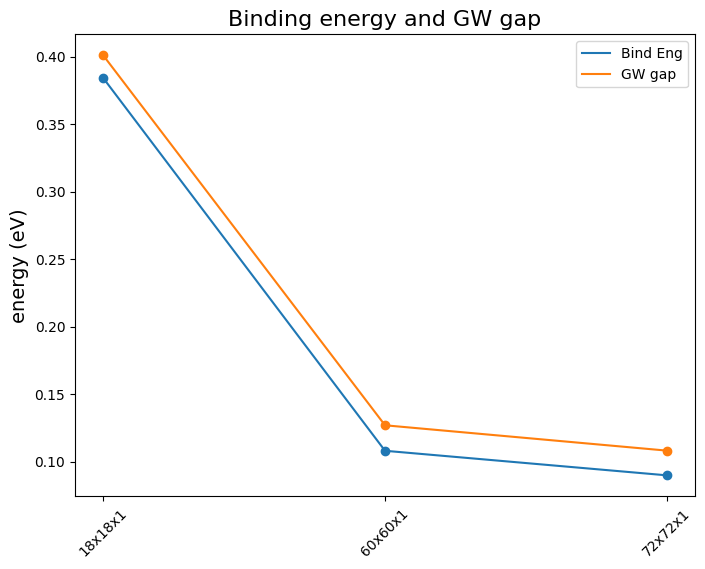

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(kpoints,excitations)
ax.plot(kpoints,excitations,label='Bind Eng')
gw_gaps = [ksamplings[k]['gw_gap'] for k in ksamplings]
ax.scatter(kpoints,gw_gaps)
ax.plot(kpoints,gw_gaps,label='GW gap')
labels = list(ksamplings.keys())
plt.xticks(np.arange(len(kpoints)), kpoints, rotation=45,size=10)
ax.set_title('Binding energy and GW gap',size=16)
ax.set_ylabel('energy (eV)',size=14)
ax.legend()
#ax.set_ylim(0.42,0.55)

In [81]:
#alpha_data[0]

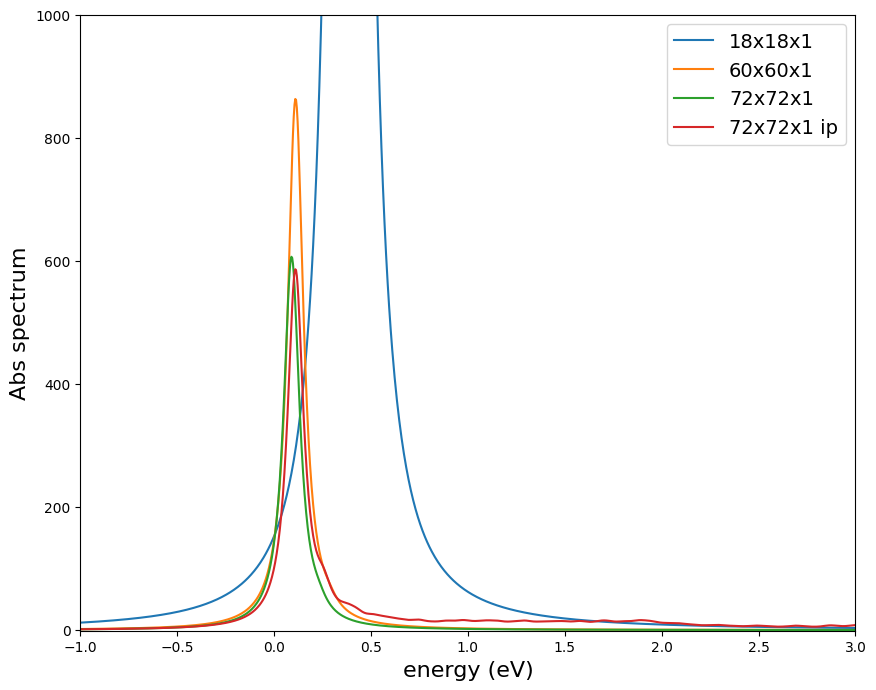

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))

for ind in range(len(kpoints)):
    data = alpha_data[ind]['alpha_q1_slepc_bse']
    energy = data['energy']
    alpha_im = data['alpha_imag']
    ax.plot(energy,alpha_im,label=kpoints[ind])
alpha_o_im = alpha_data[-1]['alpha_q1_slepc_bse']['alpha_o_imag']
ax.plot(energy,alpha_o_im,label='72x72x1 ip') 
ax.set_xlim(-1,3)
ax.set_ylim(-1,1000)
ax.set_ylabel('Abs spectrum',size=16)
ax.set_xlabel('energy (eV)',size=16)
ax.legend(fontsize=14)